In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [79]:
mmh = pd.read_csv('mxmh_survey_results.csv')
mmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


We shall esamine the breakdown of our potential target feature.

In [56]:
mmh['Music effects'].value_counts()

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

In [57]:
mmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [58]:
mmh.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [80]:
duplicate = mmh[mmh.duplicated(['Timestamp'], keep=False)]
duplicate.count()

Timestamp                       2
Age                             2
Primary streaming service       2
Hours per day                   2
While working                   2
Instrumentalist                 2
Composer                        2
Fav genre                       2
Exploratory                     2
Foreign languages               2
BPM                             1
Frequency [Classical]           2
Frequency [Country]             2
Frequency [EDM]                 2
Frequency [Folk]                2
Frequency [Gospel]              2
Frequency [Hip hop]             2
Frequency [Jazz]                2
Frequency [K pop]               2
Frequency [Latin]               2
Frequency [Lofi]                2
Frequency [Metal]               2
Frequency [Pop]                 2
Frequency [R&B]                 2
Frequency [Rap]                 2
Frequency [Rock]                2
Frequency [Video game music]    2
Anxiety                         2
Depression                      2
Insomnia      

We use the Timestamp feature to check for duplicates, as there cannot be two interviews at the same time.

In [81]:
duplicate.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
109,8/28/2022 16:15:08,21.0,YouTube Music,3.0,Yes,No,Yes,Metal,Yes,No,...,Never,Never,Very frequently,Rarely,10.0,0.0,10.0,10.0,Improve,I understand.
110,8/28/2022 16:15:08,23.0,Spotify,2.0,Yes,No,No,Metal,Yes,Yes,...,Never,Never,Sometimes,Rarely,6.0,3.0,0.0,1.0,Improve,I understand.


We found what seems to be a duplicate, at least at first glance. However, the data entries look pretty different, so there may have been an issure in recording the timestamp, and therefore, we are going to keep the entry.

Now we shall check for missing values.

Text(0.5, 1.0, 'Total Missing Values')

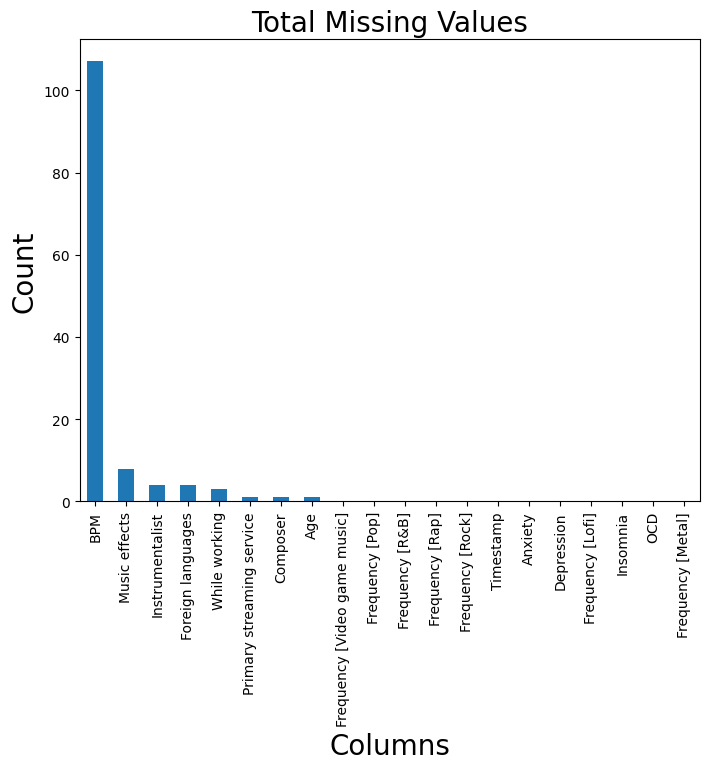

In [82]:
#Let's look for null values, since some null values might be preventing certain features from being seen as numeric.
#Now we will see if there is missing value, even if we have already filled the missing values above.
total_missing = mmh.isnull().sum().sort_values(ascending=False)
total_missing_select = total_missing.head(20)
total_missing_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

We are subsbituting the object null values with "no_data", so we can put those into a differenct chategory. For what concerns the float64 Dtypes "BPM" and "Age", even if it's not ideal, we replace them with 0, to keep them as float64 and to avoid removing rows for some missing values in just a few features.

In [ ]:
#Let's remove all the rows that miss values in the column "Music effects", since that is our target variable.

In [83]:
mmh.dropna(subset=['Music effects'], inplace=True)

In [84]:
print(mmh['Music effects'].isnull().sum())

0


In [85]:
#There are some features that have a few missing values and can be potentially importan, so let's remove those rows as well.
columns_to_clean = ['Foreign languages', 'Instrumentalist', 'While working', 'Primary streaming service', 'Age']
mmh.dropna(subset=columns_to_clean, inplace=True)
print(mmh[columns_to_clean].isnull().sum())

Foreign languages            0
Instrumentalist              0
While working                0
Primary streaming service    0
Age                          0
dtype: int64


Text(0.5, 1.0, 'Total Missing Values')

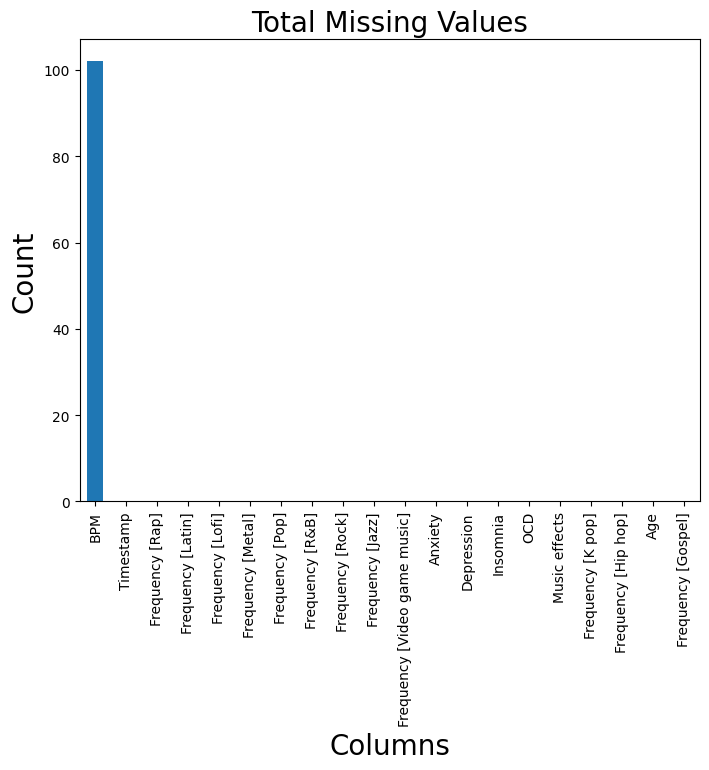

In [86]:
#Let's look for null values, since some null values might be preventing certain features from being seen as numeric.
#Now we will see if there is missing value, even if we have already filled the missing values above.
total_missing = mmh.isnull().sum().sort_values(ascending=False)
total_missing_select = total_missing.head(20)
total_missing_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [87]:
objects_to_replace = mmh.columns.difference(['BPM'])
mmh[objects_to_replace].fillna("no_data", inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_10580\1364371172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmh[objects_to_replace].fillna("no_data", inplace=True)


In [88]:
mmh.fillna(0, inplace=True)

In [89]:
mmh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     718 non-null    object 
 1   Age                           718 non-null    float64
 2   Primary streaming service     718 non-null    object 
 3   Hours per day                 718 non-null    float64
 4   While working                 718 non-null    object 
 5   Instrumentalist               718 non-null    object 
 6   Composer                      718 non-null    object 
 7   Fav genre                     718 non-null    object 
 8   Exploratory                   718 non-null    object 
 9   Foreign languages             718 non-null    object 
 10  BPM                           718 non-null    float64
 11  Frequency [Classical]         718 non-null    object 
 12  Frequency [Country]           718 non-null    object 
 13  Frequency 

In [90]:
mmh.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000
mean,25.176880,3.578064,1.392864e+06,5.837744,4.806407,3.717967,2.635097
std,11.953918,3.017779,3.731966e+07,2.784533,3.020061,3.084387,2.844382
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,8.600000e+01,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.155000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,4.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Text(0.5, 1.0, 'Total Missing Values')

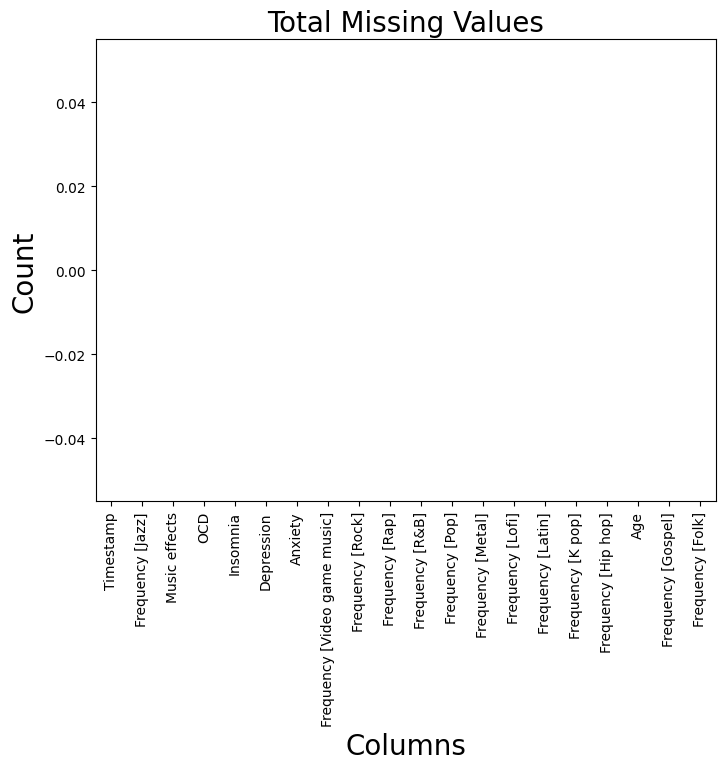

In [91]:
#Let's look for null values, since some null values might be preventing certain features from being seen as numeric.
#Now we will see if there is missing value, even if we have already filled the missing values above.
total_missing = mmh.isnull().sum().sort_values(ascending=False)
total_missing_select = total_missing.head(20)
total_missing_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [92]:
#Let's make sure that every subject gave their consent.
mmh['Permissions'].value_counts()

Permissions
I understand.    718
Name: count, dtype: int64

In [93]:
#We can drop "Timestamp" and "Permissions"
mmh = mmh.drop(["Timestamp", "Permissions"], axis=1)
mmh.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

It's time to encode the categorical features.

In [94]:
mmh.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000
mean,25.176880,3.578064,1.392864e+06,5.837744,4.806407,3.717967,2.635097
std,11.953918,3.017779,3.731966e+07,2.784533,3.020061,3.084387,2.844382
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,8.600000e+01,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.155000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,4.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Before proceding further, we have a few features that may use some standardization, so let's standardize them.

In [95]:
from sklearn.preprocessing import (StandardScaler)

In [96]:
# We can want to standardize only the features that where originally numerica;
features_to_standardize = ['Age','Hours per day', 'BPM','Anxiety', 
                                                      'Depression', 'Insomnia', 'OCD']

# Create a RobustScaler instance
standard_scaler = StandardScaler()

# Standardize the selected features using RobustScaler
standardized_features = pd.DataFrame(standard_scaler.fit_transform(mmh[features_to_standardize]),
                                      columns=features_to_standardize)

# Display the new DataFrame with standardized features
standardized_features.head(5)

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
0,-0.600797,0.139914,-0.037345,0.417688,0.726847,2.038140,-0.223437
1,2.998857,-0.357487,-0.037346,1.136442,0.726847,-0.232937,0.128378
2,-0.600797,0.139914,-0.037346,0.417688,-0.929903,0.415942,2.239270
3,-0.600797,0.471515,-0.037346,0.777065,1.058197,1.064821,1.535639
4,-0.600797,-0.191686,-0.037347,-0.660443,1.058197,0.740382,-0.927068


In [97]:
# Copy the original dataset to avoid modifying it
mmh_standardized = mmh.copy()

# Replace the original columns with standardized features
mmh_standardized[features_to_standardize] = standardized_features

# Display the updated mmh_standardized dataset
mmh_standardized.head(5)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,-0.600797,Spotify,0.139914,No,No,No,Video game music,No,Yes,-0.037346,...,Rarely,Never,Rarely,Rarely,Very frequently,0.417688,-0.929903,0.415942,2.239270,No effect
3,-0.600797,YouTube Music,0.471515,Yes,No,Yes,Jazz,Yes,Yes,-0.037346,...,Sometimes,Sometimes,Never,Never,Never,0.777065,1.058197,1.064821,1.535639,Improve
4,-0.600797,Spotify,-0.191686,Yes,No,No,R&B,Yes,No,-0.037347,...,Sometimes,Very frequently,Very frequently,Never,Rarely,-0.660443,1.058197,0.740382,-0.927068,Improve
5,-0.349659,Spotify,-0.854887,Yes,Yes,Yes,Jazz,Yes,Yes,-0.037346,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,-0.301066,-0.598553,0.415942,0.128378,Improve
6,-0.517085,YouTube Music,0.803115,Yes,Yes,No,Video game music,Yes,Yes,-0.037346,...,Rarely,Rarely,Never,Never,Sometimes,-1.379197,-1.592603,-1.206255,-0.927068,Improve


In [98]:
mmh_standardized.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.001098,-0.005493,0.000960,0.000554,-0.007803,-0.000962,0.002730
std,1.004304,0.992779,1.013482,1.002946,0.997638,0.993637,1.000516
min,-1.270501,-1.186488,-0.037349,-2.097951,-1.592603,-1.206255,-0.927068
25%,-0.600797,-0.523287,-0.037346,-0.660443,-0.929903,-0.881816,-0.927068
50%,-0.349659,-0.191686,-0.037345,0.058311,0.064147,-0.232937,-0.223437
75%,0.236332,0.471515,-0.037345,0.777065,0.726847,0.740382,0.480194
max,5.342818,6.771925,26.776856,1.495819,1.720897,2.038140,2.591085


In [99]:
mmh.to_pickle('mmh.pkl')
mmh_standardized.to_pickle('mmh_standardized.pkl')

In [100]:
mmh = pd.read_pickle('mmh.pkl')

Let's check what different values we encoutner in our target variable.

In [101]:
mmh['Music effects'].value_counts()

Music effects
Improve      535
No effect    166
Worsen        17
Name: count, dtype: int64

Let's encode our target variable with LabelEncoder, so we have a separate class for each outcome.

In [102]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mmh['Music effects'] = le.fit_transform(mmh['Music effects'])
mmh['Music effects'].sample(5)

81     0
228    1
25     0
378    1
45     0
Name: Music effects, dtype: int32

Regarding the rest of the categorical variables, since we have many variables that may, we want to encode all the object features into int64 with one hot encoding.

In [103]:
mmh_encoded = pd.get_dummies(mmh, drop_first=True, dtype="int64")
mmh_encoded.sample(5)

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Music effects,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,...,Frequency [R&B]_Very frequently,Frequency [Rap]_Rarely,Frequency [Rap]_Sometimes,Frequency [Rap]_Very frequently,Frequency [Rock]_Rarely,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently
486,48.0,1.5,185.0,10.0,8.0,0.0,4.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
501,24.0,2.0,159.0,7.0,6.0,2.0,7.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
568,16.0,7.0,999999999.0,4.0,8.0,8.0,4.0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
78,18.0,2.0,150.0,9.0,0.0,5.0,10.0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
143,53.0,7.0,92.0,0.0,0.0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,1,1,0,0


In [104]:
mmh_encoded.columns

Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects',
       'Primary streaming service_I do not use a streaming service.',
       'Primary streaming service_Other streaming service',
       'Primary streaming service_Pandora',
       'Primary streaming service_Spotify',
       'Primary streaming service_YouTube Music', 'While working_Yes',
       'Instrumentalist_Yes', 'Composer_Yes', 'Fav genre_Country',
       'Fav genre_EDM', 'Fav genre_Folk', 'Fav genre_Gospel',
       'Fav genre_Hip hop', 'Fav genre_Jazz', 'Fav genre_K pop',
       'Fav genre_Latin', 'Fav genre_Lofi', 'Fav genre_Metal', 'Fav genre_Pop',
       'Fav genre_R&B', 'Fav genre_Rap', 'Fav genre_Rock',
       'Fav genre_Video game music', 'Exploratory_Yes',
       'Foreign languages_Yes', 'Frequency [Classical]_Rarely',
       'Frequency [Classical]_Sometimes',
       'Frequency [Classical]_Very frequently', 'Frequency [Country]_Rarely',
       'Frequency [Country]_Some

The encoding ws successful, now let's explore the characteristics of the new dataset.

In [105]:
mmh_encoded.to_pickle('mmh_encoded.pkl')

In [106]:
mmh_encoded.head()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Music effects,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,...,Frequency [R&B]_Very frequently,Frequency [Rap]_Rarely,Frequency [Rap]_Sometimes,Frequency [Rap]_Very frequently,Frequency [Rock]_Rarely,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5,18.0,5.0,86.0,8.0,8.0,7.0,7.0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
6,18.0,3.0,66.0,4.0,8.0,6.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [107]:
mmh_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 81 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Age                                                          718 non-null    float64
 1   Hours per day                                                718 non-null    float64
 2   BPM                                                          718 non-null    float64
 3   Anxiety                                                      718 non-null    float64
 4   Depression                                                   718 non-null    float64
 5   Insomnia                                                     718 non-null    float64
 6   OCD                                                          718 non-null    float64
 7   Music effects                                                718 non-null    int32  


In [108]:
mmh_encoded.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Music effects,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,...,Frequency [R&B]_Very frequently,Frequency [Rap]_Rarely,Frequency [Rap]_Sometimes,Frequency [Rap]_Very frequently,Frequency [Rock]_Rarely,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently
count,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,...,718.000000,718.000000,718.000000,718.000000,718.000000,718.00000,718.000000,718.000000,718.000000,718.000000
mean,25.176880,3.578064,1.392864e+06,5.837744,4.806407,3.717967,2.635097,0.278552,0.096100,0.068245,...,0.160167,0.292479,0.264624,0.174095,0.129526,0.29805,0.451253,0.270195,0.250696,0.160167
std,11.953918,3.017779,3.731966e+07,2.784533,3.020061,3.084387,2.844382,0.498659,0.294934,0.252342,...,0.367017,0.455218,0.441440,0.379455,0.336016,0.45772,0.497965,0.444370,0.433716,0.367017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,8.600000e+01,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,3.000000,1.155000e+02,6.000000,5.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,4.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.750000,0.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [109]:
mmh_encoded.shape

(718, 81)

In [110]:
mmh_encoded.columns

Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects',
       'Primary streaming service_I do not use a streaming service.',
       'Primary streaming service_Other streaming service',
       'Primary streaming service_Pandora',
       'Primary streaming service_Spotify',
       'Primary streaming service_YouTube Music', 'While working_Yes',
       'Instrumentalist_Yes', 'Composer_Yes', 'Fav genre_Country',
       'Fav genre_EDM', 'Fav genre_Folk', 'Fav genre_Gospel',
       'Fav genre_Hip hop', 'Fav genre_Jazz', 'Fav genre_K pop',
       'Fav genre_Latin', 'Fav genre_Lofi', 'Fav genre_Metal', 'Fav genre_Pop',
       'Fav genre_R&B', 'Fav genre_Rap', 'Fav genre_Rock',
       'Fav genre_Video game music', 'Exploratory_Yes',
       'Foreign languages_Yes', 'Frequency [Classical]_Rarely',
       'Frequency [Classical]_Sometimes',
       'Frequency [Classical]_Very frequently', 'Frequency [Country]_Rarely',
       'Frequency [Country]_Some

No we need to select what is going to be the dependent variable. However, we have several psychological disorders, and before we choose one, it can be useful to explore their characteristics and and comorbidity between each other.

In [111]:
disorders = mmh_encoded[['Anxiety', 'Depression', 'Insomnia',
       'OCD']]
column_sums = disorders.sum()
print(column_sums)

Anxiety       4191.5
Depression    3451.0
Insomnia      2669.5
OCD           1892.0
dtype: float64


We see that anxiety is the most pronounced disorder, followed by depression.

<Axes: >

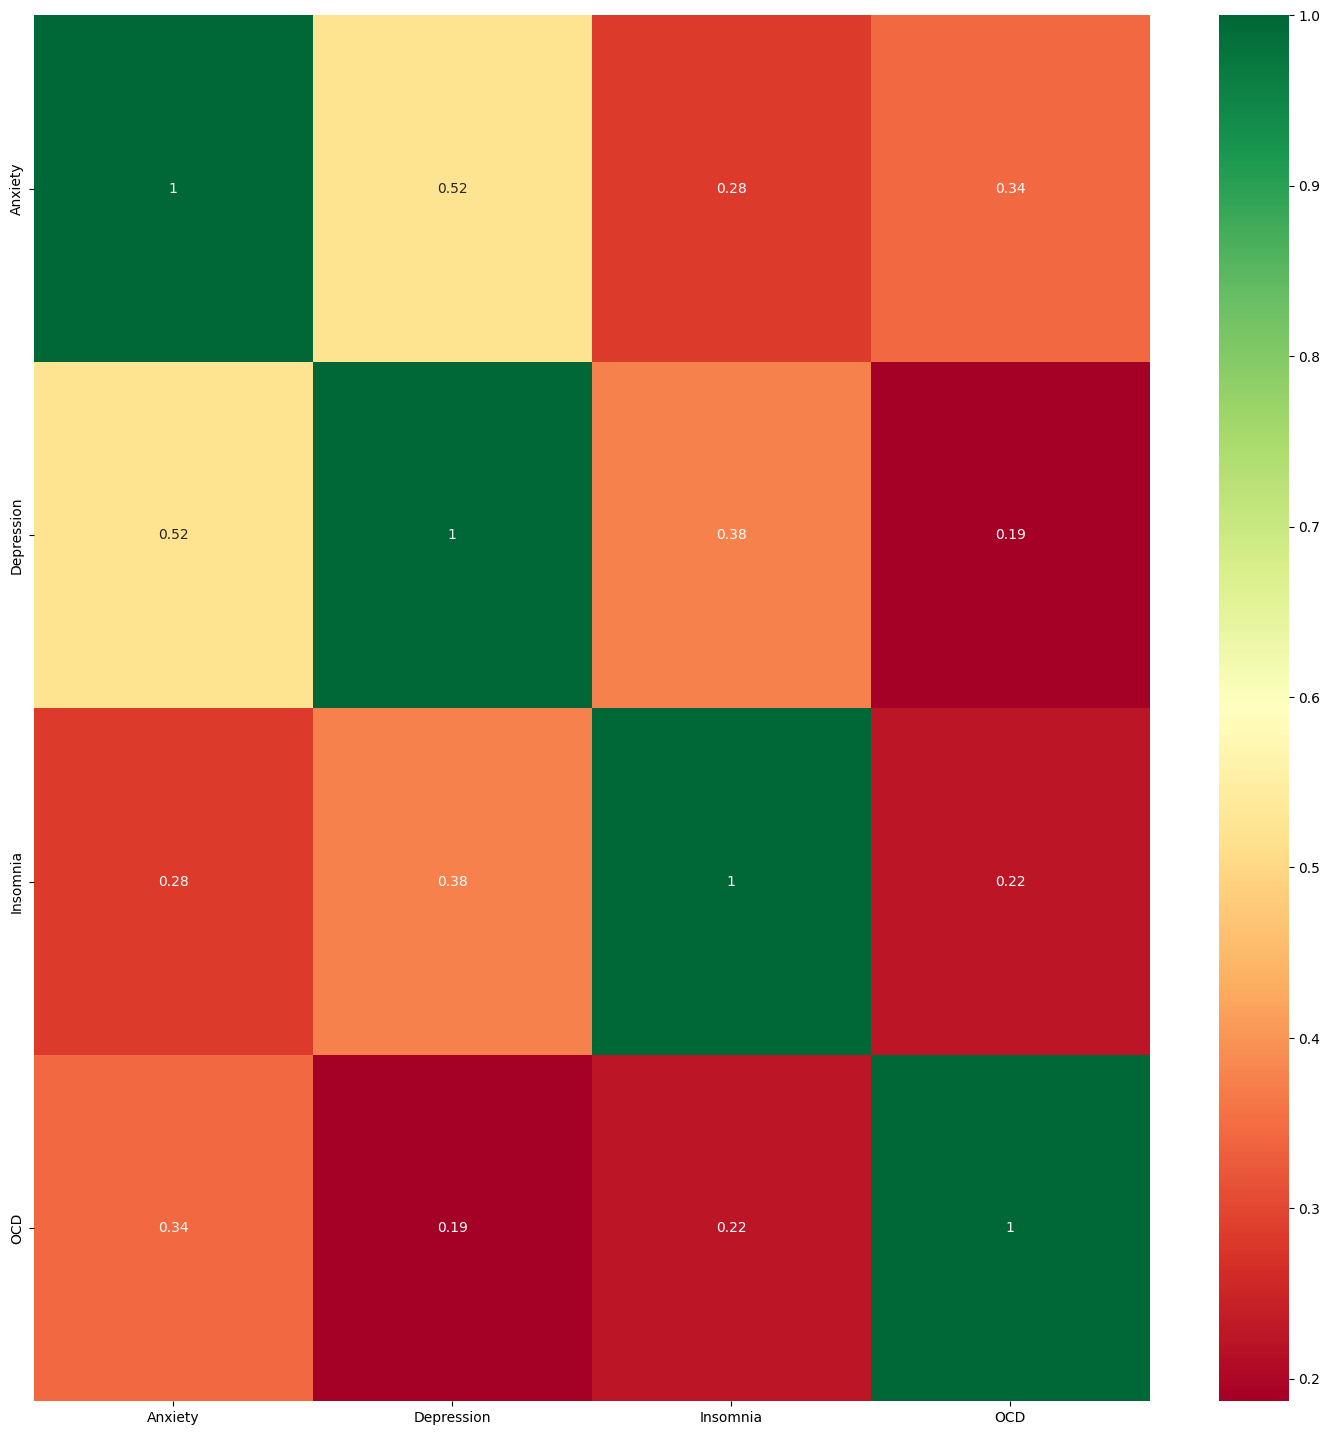

In [112]:
plt.figure(figsize=(18,18))
sns.heatmap(disorders.corr(),annot=True,cmap="RdYlGn")

There is no negative correlation between the disorders, and the lowest correlation coefficients are 0.2 and 0.23 between OCD and Depression and Insomnia, respectively. So we can say, that there is commorbidity. Moreover, to avoid multicollinearity, we should just select one of the disorders and remove the others. The strongest correlation is among depression and anxiety (0.52), so we might want to pick one of the two. Before making a decision, we should see the correlations between the disorders and the rest of the dataset. We are not going to use a correlation matrix, because we have more than 80 columns, so we are performing the correlation function with each of the four potential target variables.

In [113]:
anxiety_corr = mmh_encoded.corr()['Anxiety'][:-1] # -1 means that the latest row is log_transformed_streams
top_features = anxiety_corr[abs(anxiety_corr) > 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} correlated values with log_transformed_streams:\n{}".format(len(top_features), top_features))

There is 8 correlated values with log_transformed_streams:
Anxiety                             1.000000
Depression                          0.520923
OCD                                 0.343774
Insomnia                            0.282420
Frequency [Lofi]_Sometimes          0.125815
Frequency [Metal]_Sometimes         0.124906
Frequency [Rock]_Very frequently    0.102164
Age                                -0.187165
Name: Anxiety, dtype: float64


In [114]:
depression_corr = mmh_encoded.corr()['Depression'][:-1] # -1 means that the latest row is log_transformed_streams
top_features = anxiety_corr[abs(anxiety_corr) > 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} correlated values with log_transformed_streams:\n{}".format(len(top_features), top_features))

There is 8 correlated values with log_transformed_streams:
Anxiety                             1.000000
Depression                          0.520923
OCD                                 0.343774
Insomnia                            0.282420
Frequency [Lofi]_Sometimes          0.125815
Frequency [Metal]_Sometimes         0.124906
Frequency [Rock]_Very frequently    0.102164
Age                                -0.187165
Name: Anxiety, dtype: float64


In [115]:
insomnia_corr = mmh_encoded.corr()['Insomnia'][:-1] # -1 means that the latest row is log_transformed_streams
top_features = anxiety_corr[abs(anxiety_corr) > 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} correlated values with log_transformed_streams:\n{}".format(len(top_features), top_features))

There is 8 correlated values with log_transformed_streams:
Anxiety                             1.000000
Depression                          0.520923
OCD                                 0.343774
Insomnia                            0.282420
Frequency [Lofi]_Sometimes          0.125815
Frequency [Metal]_Sometimes         0.124906
Frequency [Rock]_Very frequently    0.102164
Age                                -0.187165
Name: Anxiety, dtype: float64


In [116]:
OCD_corr = mmh_encoded.corr()['OCD'][:-1] # -1 means that the latest row is log_transformed_streams
top_features = anxiety_corr[abs(anxiety_corr) > 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} correlated values with log_transformed_streams:\n{}".format(len(top_features), top_features))

There is 8 correlated values with log_transformed_streams:
Anxiety                             1.000000
Depression                          0.520923
OCD                                 0.343774
Insomnia                            0.282420
Frequency [Lofi]_Sometimes          0.125815
Frequency [Metal]_Sometimes         0.124906
Frequency [Rock]_Very frequently    0.102164
Age                                -0.187165
Name: Anxiety, dtype: float64


In [117]:
while_working_corr = mmh_encoded.corr()['While working_Yes'][:-1] # -1 means that the latest row is log_transformed_streams
top_features = anxiety_corr[abs(anxiety_corr) > 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} correlated values with log_transformed_streams:\n{}".format(len(top_features), top_features))


There is 8 correlated values with log_transformed_streams:
Anxiety                             1.000000
Depression                          0.520923
OCD                                 0.343774
Insomnia                            0.282420
Frequency [Lofi]_Sometimes          0.125815
Frequency [Metal]_Sometimes         0.124906
Frequency [Rock]_Very frequently    0.102164
Age                                -0.187165
Name: Anxiety, dtype: float64


In [118]:
mmh_encoded.columns

Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects',
       'Primary streaming service_I do not use a streaming service.',
       'Primary streaming service_Other streaming service',
       'Primary streaming service_Pandora',
       'Primary streaming service_Spotify',
       'Primary streaming service_YouTube Music', 'While working_Yes',
       'Instrumentalist_Yes', 'Composer_Yes', 'Fav genre_Country',
       'Fav genre_EDM', 'Fav genre_Folk', 'Fav genre_Gospel',
       'Fav genre_Hip hop', 'Fav genre_Jazz', 'Fav genre_K pop',
       'Fav genre_Latin', 'Fav genre_Lofi', 'Fav genre_Metal', 'Fav genre_Pop',
       'Fav genre_R&B', 'Fav genre_Rap', 'Fav genre_Rock',
       'Fav genre_Video game music', 'Exploratory_Yes',
       'Foreign languages_Yes', 'Frequency [Classical]_Rarely',
       'Frequency [Classical]_Sometimes',
       'Frequency [Classical]_Very frequently', 'Frequency [Country]_Rarely',
       'Frequency [Country]_Some

In [119]:
music_effects = mmh_encoded.corr()['Music effects'][:-1] # -1 means that the latest row is log_transformed_streams
top_features = music_effects[abs(music_effects) > 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} correlated values with log_transformed_streams:\n{}".format(len(top_features), top_features))

There is 6 correlated values with log_transformed_streams:
Music effects                 1.000000
Fav genre_Video game music    0.106275
Instrumentalist_Yes          -0.100678
Frequency [EDM]_Rarely       -0.100897
Exploratory_Yes              -0.143625
While working_Yes            -0.171038
Name: Music effects, dtype: float64


<Axes: >

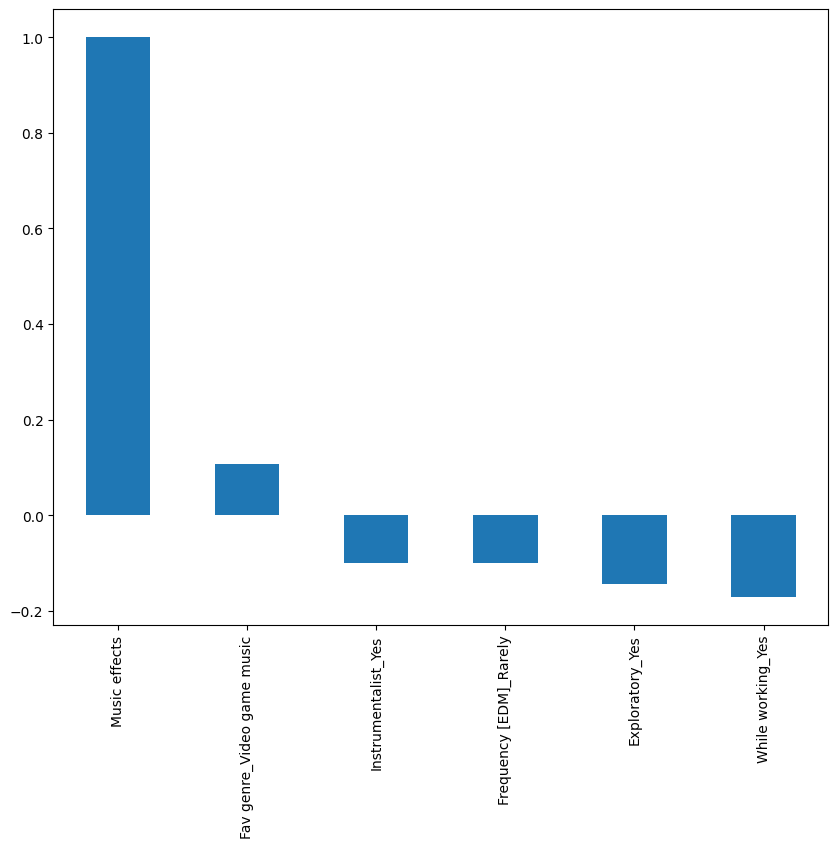

In [120]:
top_features.plot(kind="bar",figsize=(10,8))

Looking at the correlations of the different variables, it seems that it makes little sense creating a model that predicts on of those disorders baded on the other variable, since the correlation seems very thin. However, it looks far more interesting working on the 'Music effect_Improve' feature, as dependent variable.
Before proceding, we are going to remove the columns where music worsten or had no effect on mental disorders, but still maintaining the rows.

In [121]:
mmh_encoded = pd.read_pickle('mmh_encoded.pkl')

This models have many features, which make it very complex, so we should consider decreasing it's complexity, by selecting only the features with the highest correlation with the target variable.

In [122]:
features_to_keep = ['Music effects', 'Exploratory_Yes', 'Fav genre_Video game music', 'Instrumentalist_Yes', 'Frequency [EDM]_Rarely', 'While working_Yes']
mmh_for_model = mmh_encoded[features_to_keep]

In [123]:
mmh_for_model.columns

Index(['Music effects', 'Exploratory_Yes', 'Fav genre_Video game music',
       'Instrumentalist_Yes', 'Frequency [EDM]_Rarely', 'While working_Yes'],
      dtype='object')

In [124]:
mmh_for_model.head()

,Music effects,Exploratory_Yes,Fav genre_Video game music,Instrumentalist_Yes,Frequency [EDM]_Rarely,While working_Yes
2,1,0,1,0,0,0
3,0,1,0,0,0,1
4,0,1,0,0,1,1
5,0,1,0,1,0,1
6,0,1,1,1,1,1


Now we are ready to work on our model; but before we do that, we shall save the new dataset into a pickle file, so we can retrieve it easily without having to run all the cells above.

In [125]:
mmh_for_model.to_pickle('mmh_for_model.pkl')

In [3]:
mmh_for_model = pd.read_pickle('mmh_for_model.pkl')

In [ ]:
#Let's train our models now.

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit

In [127]:
mmh_for_model.reset_index(drop=True, inplace=True)

In [128]:
feature_cols = ['Exploratory_Yes', 'Fav genre_Video game music', 'Instrumentalist_Yes', 'Frequency [EDM]_Rarely', 'While working_Yes']

# Reset the index of the DataFrame
mmh_for_model.reset_index(drop=True, inplace=True)

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(mmh_for_model[feature_cols], mmh_for_model['Music effects']))

# Create the dataframes
X_train = mmh_for_model.loc[train_idx, feature_cols]
y_train = mmh_for_model.loc[train_idx, 'Music effects']

X_test  = mmh_for_model.loc[test_idx, feature_cols]
y_test  = mmh_for_model.loc[test_idx, 'Music effects']

In [129]:
y_train.value_counts(normalize=True)

Music effects
0    0.745020
1    0.231076
2    0.023904
Name: proportion, dtype: float64

In [130]:
X_train.head()

,Exploratory_Yes,Fav genre_Video game music,Instrumentalist_Yes,Frequency [EDM]_Rarely,While working_Yes
655,1,0,1,0,1
195,1,0,0,0,1
240,0,0,0,0,1
157,1,0,0,0,1
269,1,1,1,0,1


In [131]:
y_test.value_counts(normalize=True)

Music effects
0    0.745370
1    0.231481
2    0.023148
Name: proportion, dtype: float64

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [158]:
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [159]:
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

Let's apply L2 regression. There is a quick and and an extensive way of doing so; let's try both.

In [160]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [24]:
# L2 penalty to shrink coefficients without removing any features from the model
#penalty= 'l2'
# Our classification problem is multinomial
#multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
#solver = 'lbfgs'
# Max iteration = 1000
#max_iter = 1000
#rs=42

In [26]:
# Define a logistic regression model with above arguments
#lr_l2 = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [27]:
#lr_l2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [136]:
#l2_preds = lr_l2.predict(X_test)

In [161]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2]], 
                                 codes=[[0,0,0], [0,1,2]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(5)

lr                            l1                       l2            \
          0         1         2         0         1    2         0         1   
3  0.437817 -0.345262 -0.826841  0.444155 -0.347577  0.0  0.456495 -0.314974   
4  0.735846 -0.758431 -0.522075  0.762361 -0.790890  0.0  0.762235 -0.706227   
2  0.329491 -0.251532 -0.650583  0.327773 -0.243891  0.0  0.340003 -0.239379   
0  0.556567 -0.549106 -0.619113  0.560253 -0.560450  0.0  0.565420 -0.529015   
1 -1.051852  0.635986  1.232709 -1.158980  0.676524  0.0 -1.151490  0.506795   

             
          2  
3 -0.006015  
4 -0.018372  
2 -0.007410  
0 -0.016719  
1 -0.001062

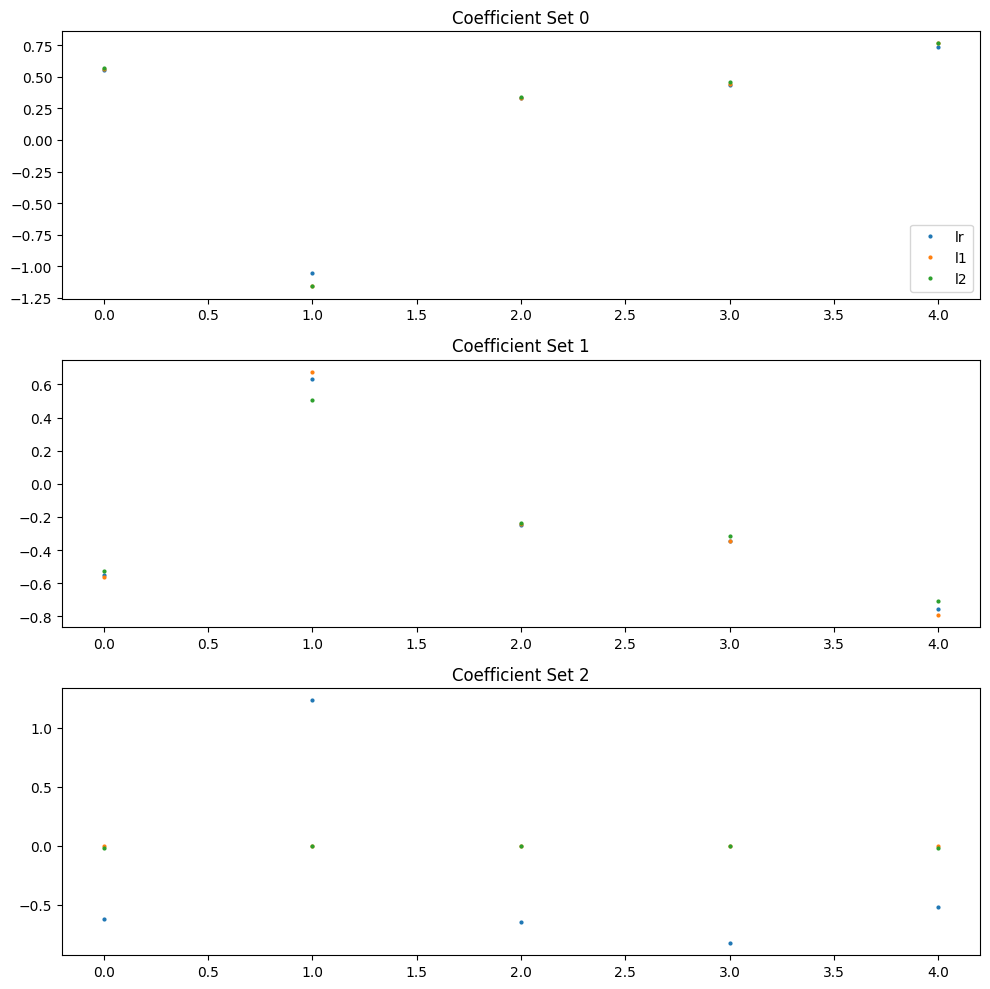

In [162]:
fig, axList = plt.subplots(nrows=3, ncols=1)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [167]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [168]:
y_prob.head()

,lr,l1,l2
0,0.848145,0.571758,0.574718
1,0.760020,0.516189,0.517917
2,0.786899,0.534788,0.537559
3,0.848145,0.571758,0.574718
4,0.848145,0.571758,0.574718


In [169]:

from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, confusion_matrix

metrics = []
cm = {}

for lab in coeff_labels:
    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred[lab], average='weighted', zero_division=1)

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0, 1, 2]),
                        label_binarize(y_pred[lab], classes=[0, 1, 2]),
                        average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision': precision, 'recall': recall,
                              'fscore': fscore, 'accuracy': accuracy,
                              'auc': auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)


In [170]:
metrics

,lr,l1,l2
precision,0.636530,0.785185,0.785185
recall,0.736111,0.722222,0.722222
fscore,0.640040,0.626834,0.626834
accuracy,0.736111,0.722222,0.722222
auc,0.500055,0.494873,0.494873


L1 and L2 seem to be the best in terms of precision (true positives over positives), and even if they're sligthly worse than simple logistic regression in all other metrics, the difference in precision is so great, that we can say that L1 and L2 have the best performance. Moreover, since we want to mainly predict the cases in which music improves mental health, and we want to avoid the cases in which music makes it worse, precision is a very important mentric for us. L1 has both a fairly good precision, recall (ability to identify the relevant points), and accuracy (correct predictions divided by total prediction).

However, since AUC (Area under the ROC Curve) is around 0.5. It means that there is a 50% probability that the model ranks a random positive example more highly that a random negative example. As such, the corresponding classification model is basically worthless, as its predictive ability is no better than random guessing.

Precision, recall, and accuracy are not high, but fairly decent. Wheereas AUC and fscore are low, especially the former. Let's plot a confusion matrix to visually understand what is going on.

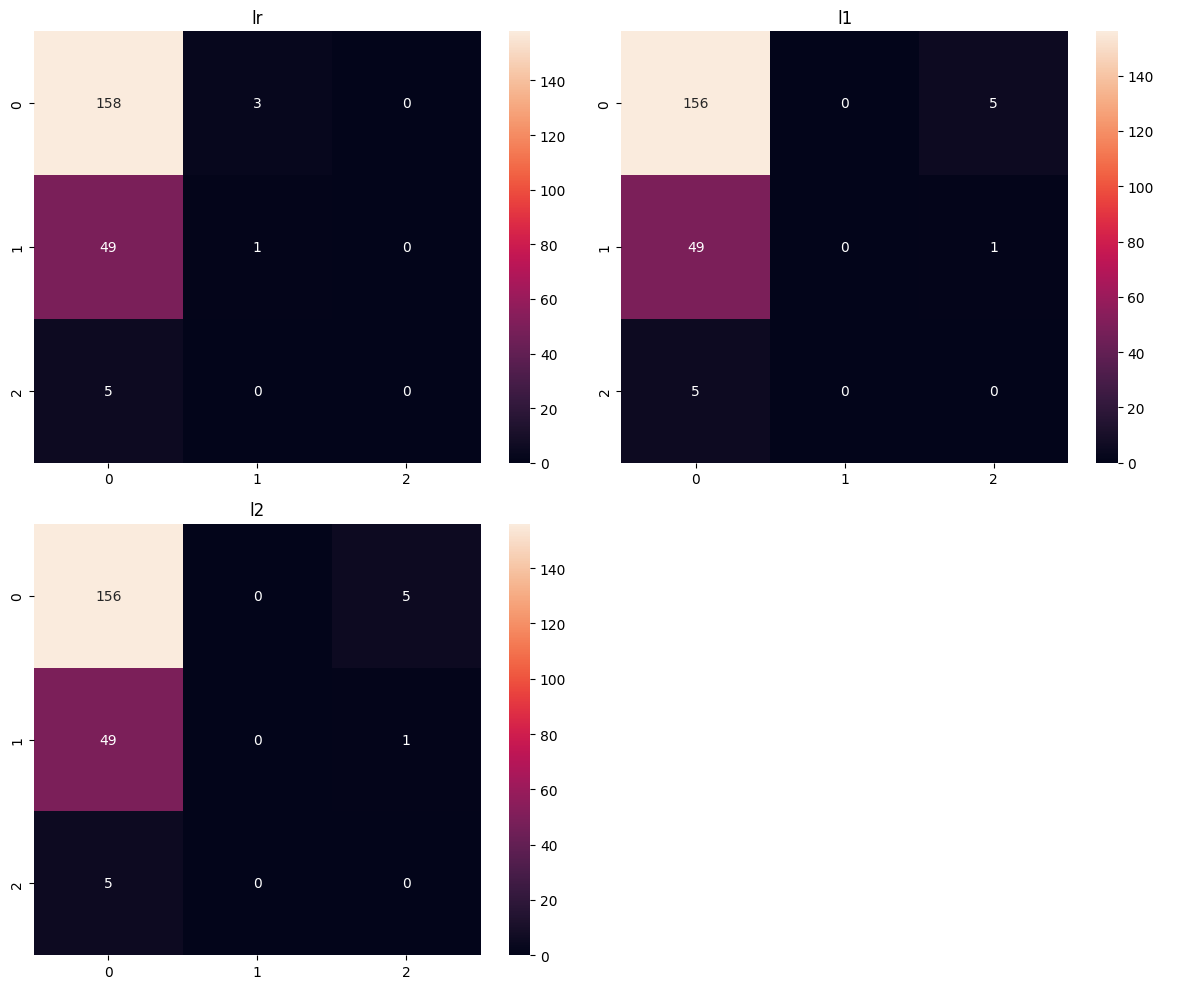

In [171]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

We can see that even if we have 156-158 True positive with the "effect" class, the class "no effect" is erroneously predicted as "effect". There might be different reasons for this, but one thing we can easily see, is that the dataset is heavily unbalanced. So we need to take care of that.

One way to interpret logistic regression models is by analyzing feature coefficients. Although it may not be as effective as the regular linear regression models because the logistic regression model has a sigmoid function, we can still get a sense for the importance or impact of each feature.

In [172]:
lr.coef_

array([[ 0.55656695, -1.05185211,  0.32949086,  0.43781672,  0.73584614],
       [-0.54910635,  0.63598597, -0.25153199, -0.34526202, -0.75843147],
       [-0.6191135 ,  1.23270851, -0.65058314, -0.82684086, -0.52207535]])

In [173]:
lr_l1.coef_

array([[ 0.5602534 , -1.15897987,  0.32777312,  0.44415549,  0.76236109],
       [-0.5604501 ,  0.67652437, -0.24389148, -0.34757732, -0.79089004],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

Here we can see that L1 regression, reduced some coefficients to 0, like it;s supposed to do.

In [174]:
lr_l2.coef_

array([[ 5.65420125e-01, -1.15149039e+00,  3.40003043e-01,
         4.56495353e-01,  7.62235061e-01],
       [-5.29015472e-01,  5.06794663e-01, -2.39379017e-01,
        -3.14973901e-01, -7.06226721e-01],
       [-1.67187505e-02, -1.06221116e-03, -7.40983044e-03,
        -6.01501068e-03, -1.83724967e-02]])

We can see that some of the features that were reduced to 0 by L1, were not heavily penalized by L2.

Visualizing the coiefficients here will surely help.

In [175]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

In [176]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr, 0, feature_cols)

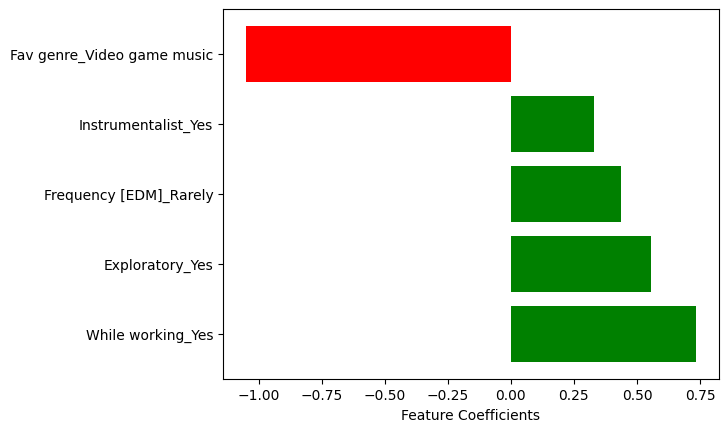

In [177]:
visualize_coefs(coef_dict)

In [46]:
coef_dict = get_feature_coefs(lr_l1, 0, feature_cols)

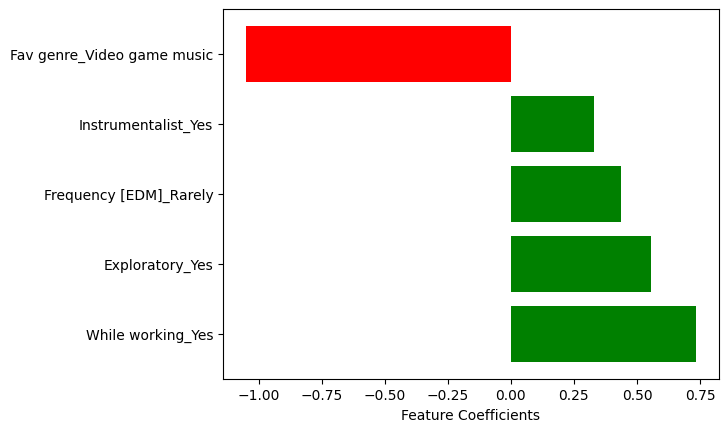

In [178]:
visualize_coefs(coef_dict)

In [179]:
coef_dict = get_feature_coefs(lr_l2, 0, feature_cols)

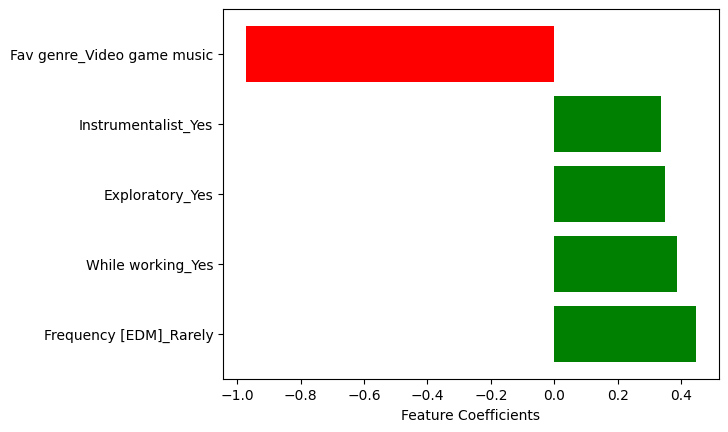

In [49]:
visualize_coefs(coef_dict)

We can see that normal logistic regression and L1 have very similar coefficients, whereas L1 have positive coefficients that are very similar to each other.

Let's zoom on the other two classes for F1.

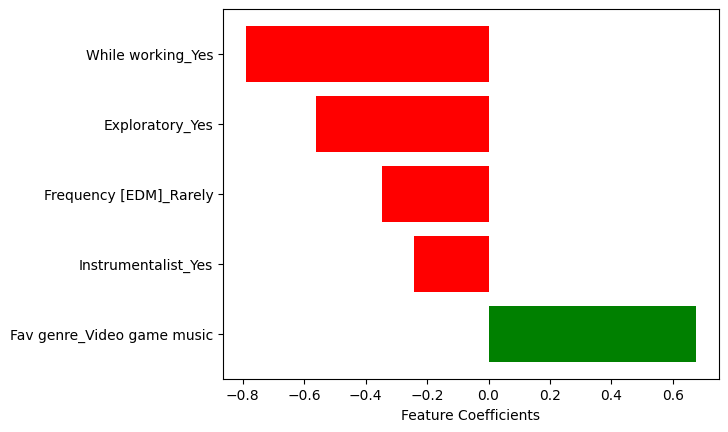

In [180]:
coef_dict = get_feature_coefs(lr_l1, 1, feature_cols)
visualize_coefs(coef_dict)

Here we can that class 1 (no_effect) has the opposite coefficients as class 0. This looks like a binary classification problem (music has either a positive effect or a negative effect). Infact, we have so few data points about the cases when music worsened mental health, that the class is basically ignored in the model, so it needs to be enhanced.

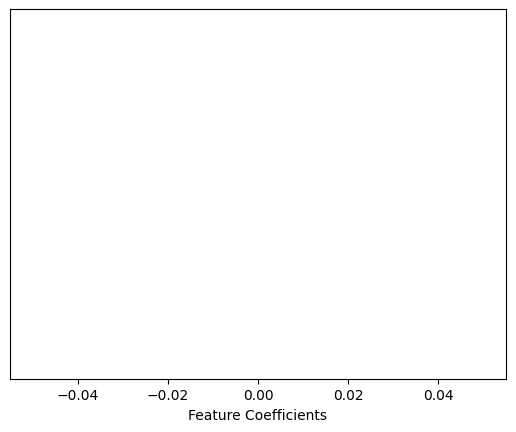

In [181]:
coef_dict = get_feature_coefs(lr_l1, 2, feature_cols)
visualize_coefs(coef_dict)

As expected, the cases when music worsened mental health got ignored.

We can see that one of the clear bottlenecks of the model is the disparity between class representation.

Before dealing with imparity, let's try to model the entire dataset, without selecting only the most correlated features. Perhaps we can find some difference in performance.

In [184]:
mmh_encoded = pd.read_pickle('mmh_encoded.pkl')

In [188]:

#Reset the index first
mmh_encoded.reset_index(drop=True, inplace=True)

#Select the dependent variables
feature_cols = mmh_encoded.columns.difference(['Music effects'])

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(mmh_encoded[feature_cols], mmh_encoded['Music effects']))

# Create the dataframes
X_train = mmh_encoded.loc[train_idx, feature_cols]
y_train = mmh_encoded.loc[train_idx, 'Music effects']

X_test  = mmh_encoded.loc[test_idx, feature_cols]
y_test  = mmh_encoded.loc[test_idx, 'Music effects']

In [189]:
y_train.value_counts(normalize=True)

Music effects
0    0.745020
1    0.231076
2    0.023904
Name: proportion, dtype: float64

In [190]:
X_train.head()

,Age,Anxiety,BPM,Composer_Yes,Depression,Exploratory_Yes,Fav genre_Country,Fav genre_EDM,Fav genre_Folk,Fav genre_Gospel,...,Hours per day,Insomnia,Instrumentalist_Yes,OCD,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,While working_Yes
655,27.0,6.0,132.0,1,10.0,1,0,0,0,0,...,10.0,8.0,1,1.0,0,0,0,1,0,1
195,19.0,9.0,76.0,1,10.0,1,0,0,0,0,...,3.0,4.0,0,0.0,0,0,0,1,0,1
240,15.0,9.0,171.0,0,6.0,0,0,1,0,0,...,2.0,1.0,0,7.0,0,0,0,1,0,1
157,49.0,8.0,156.0,0,8.0,1,0,1,0,0,...,1.0,2.0,0,0.0,0,1,0,0,0,1
269,14.0,8.0,81.0,1,6.0,1,0,0,0,0,...,4.0,5.0,1,7.0,0,0,0,1,0,1


In [191]:
y_test.value_counts(normalize=True)

Music effects
0    0.745370
1    0.231481
2    0.023148
Name: proportion, dtype: float64

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [204]:
# Standard logistic regression
lr = LogisticRegression(solver='liblinear', max_iter=1000).fit(X_train, y_train)

In [207]:
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', max_iter=100000).fit(X_train, y_train)

In [210]:
# Define a logistic regression model with above arguments
lr_l2 = LogisticRegression(random_state=42, penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=100000).fit(X_train, y_train)

In [211]:
l2_preds = lr_l2.predict(X_test)

In [212]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2]], 
                                 codes=[[0,0,0], [0,1,2]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(5)

lr                           l1                       l2  \
               0             1         2    0         1    2         0   
21  4.787225e-11 -4.712097e-11 -0.000665  0.0  0.000000  0.0  0.157055   
3   2.003164e-11 -1.965974e-11 -0.000254  0.0 -0.108170  0.0  0.148602   
62  2.682203e-11 -2.652504e-11 -0.000311  0.0  0.000000  0.0  0.010922   
28  2.648251e-11 -2.496475e-11 -0.000418  0.0 -0.027494  0.0  0.363574   
57  3.531002e-11 -3.495065e-11 -0.000393  0.0  0.000000  0.0  0.023415   

                        
           1         2  
21  0.174457 -0.331512  
3  -0.162528  0.013926  
62  0.152177 -0.163098  
28  0.126418 -0.489990  
57  0.164165 -0.187582

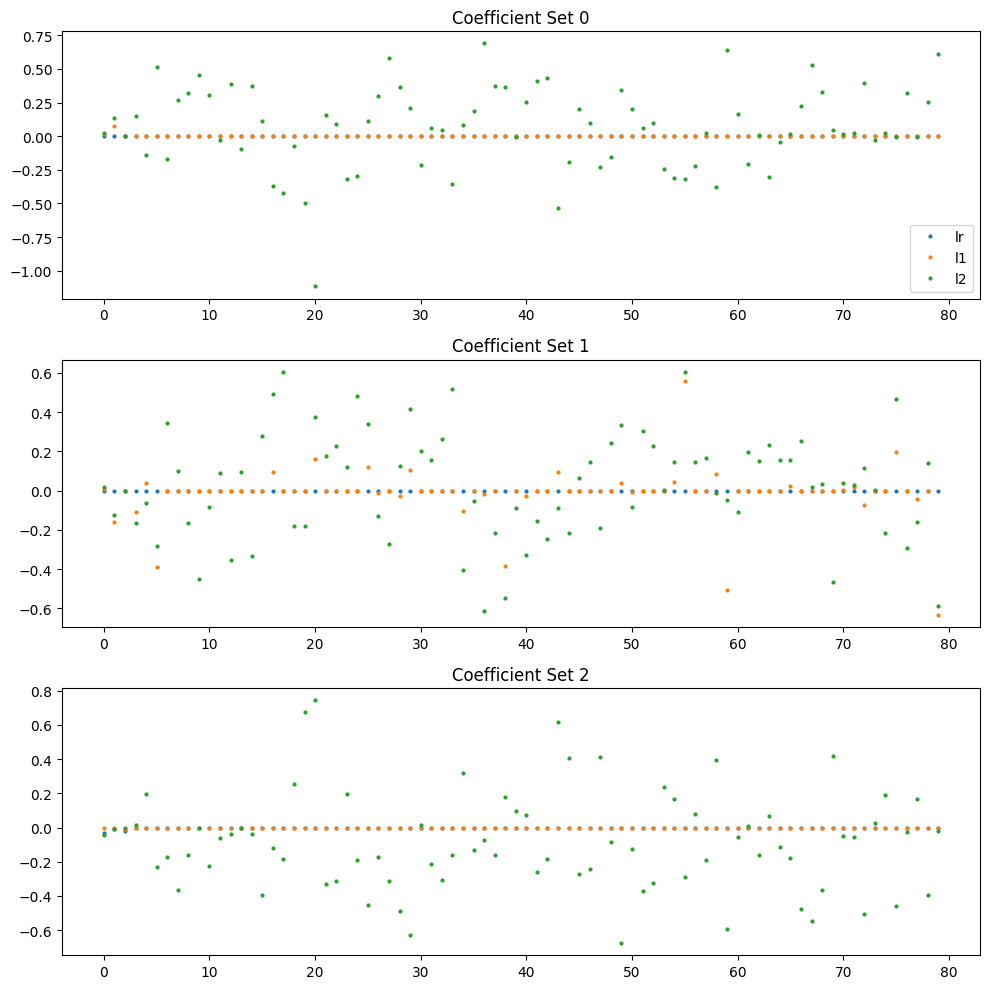

In [213]:
fig, axList = plt.subplots(nrows=3, ncols=1)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [214]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,1,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [215]:
y_prob.head()

,lr,l1,l2
0,0.482483,0.552500,0.786821
1,0.457355,0.507020,0.667275
2,0.491963,0.654565,0.803311
3,0.487869,0.649013,0.920312
4,0.492927,0.659288,0.787806


In [216]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, confusion_matrix

metrics = []
cm = {}

for lab in coeff_labels:
    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred[lab], average='weighted', zero_division=1)

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0, 1, 2]),
                        label_binarize(y_pred[lab], classes=[0, 1, 2]),
                        average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision': precision, 'recall': recall,
                              'fscore': fscore, 'accuracy': accuracy,
                              'auc': auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)


In [217]:
metrics

,lr,l1,l2
precision,0.581880,0.576951,0.688905
recall,0.287037,0.736111,0.717593
fscore,0.233507,0.632074,0.684702
accuracy,0.287037,0.736111,0.717593
auc,0.481435,0.493976,0.560953


We can see the usefulness of feature engineering here, since the full dataset had a much worse perfomance overall, even if we can see a slighlty better perfomance with L2, which is actually acceptable.

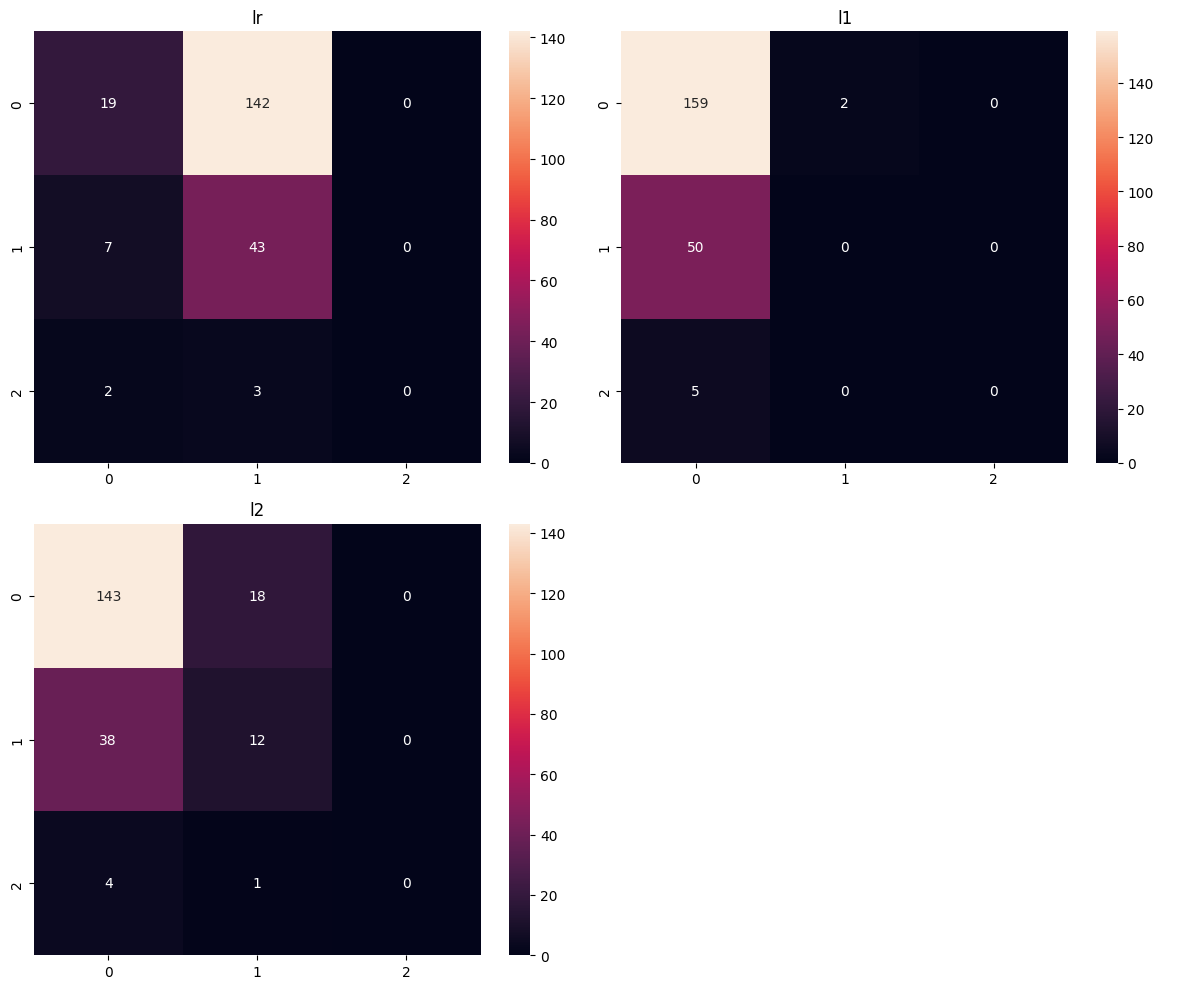

In [218]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

The standard logistic regression without any feature engineering was a disaster, but L1 and L2 were not so terrible, with L2 being acceptalble. 
We can see that the number of false positives for class 1 increased, but also the number of true positive did. So we can better predict the cases where music has no effect, but we miss some of the cases where music has a positive effect.

In [219]:
lr.coef_

array([[ 2.05579021e-09,  5.60716285e-10, -1.07031378e-08,
         2.00316441e-11,  4.23889921e-10,  7.06200236e-11,
         4.07423244e-12,  5.77183238e-12,  5.09278983e-12,
         2.03711525e-12,  5.09279079e-12,  3.05567507e-12,
         4.07423201e-12,  4.41112431e-19,  2.03711592e-12,
         1.08646251e-11,  1.29017401e-11,  2.37663768e-12,
         2.03711790e-12,  1.83340549e-11, -3.39534347e-13,
         4.78722475e-11,  3.25938687e-11,  2.17292504e-11,
         1.05251037e-11,  2.81800957e-11,  1.52783742e-11,
         7.80894561e-12,  2.64825135e-11,  1.69759545e-11,
         1.01855882e-11,  2.81800947e-11,  1.79945309e-11,
         8.82750666e-12,  1.83340482e-11,  5.77183050e-12,
         4.07423107e-12,  2.51244219e-11,  3.22543435e-11,
         1.39202990e-11,  2.95381740e-11,  2.34268390e-11,
         7.80894602e-12,  1.86735754e-11,  1.01855826e-11,
         9.84606301e-12,  2.20687649e-11,  9.50654415e-12,
         4.07423356e-12,  2.37663651e-11,  2.51244362e-1

In [220]:
lr_l1.coef_

array([[ 1.78835037e-02,  7.50136100e-02, -1.17559703e-08,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [221]:
lr_l2.coef_

array([[ 2.31472799e-02,  1.31552361e-01, -2.37953565e-04,
         1.48602210e-01, -1.38413337e-01,  5.13075862e-01,
        -1.70961229e-01,  2.66354761e-01,  3.22696469e-01,
         4.53867087e-01,  3.07943869e-01, -3.17051127e-02,
         3.91367202e-01, -9.29155807e-02,  3.69520511e-01,
         1.12657328e-01, -3.69187392e-01, -4.19180257e-01,
        -7.24561849e-02, -4.96147371e-01, -1.11758076e+00,
         1.57054810e-01,  8.80875904e-02, -3.16867424e-01,
        -2.92883290e-01,  1.14729868e-01,  2.99575113e-01,
         5.84550853e-01,  3.63573526e-01,  2.07790083e-01,
        -2.14319168e-01,  5.82042621e-02,  4.76408569e-02,
        -3.52838626e-01,  8.39978787e-02,  1.86070417e-01,
         6.89309357e-01,  3.76813438e-01,  3.65225030e-01,
        -8.93114192e-03,  2.51696772e-01,  4.13358310e-01,
         4.32239857e-01, -5.33044617e-01, -1.89096303e-01,
         2.05647122e-01,  9.60528382e-02, -2.26629366e-01,
        -1.58384166e-01,  3.40639026e-01,  2.04885283e-0

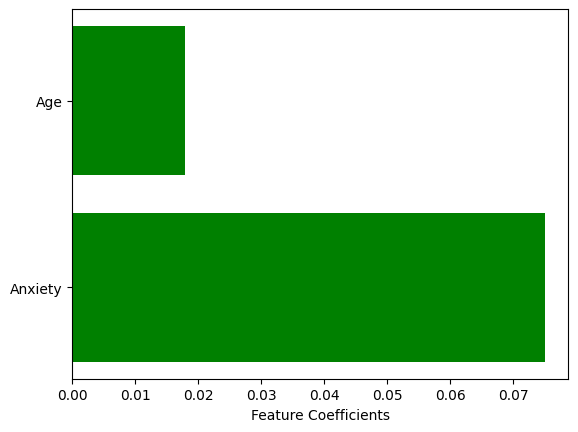

In [222]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr_l1, 0, feature_cols)
visualize_coefs(coef_dict)

However we can see that the only coeffieicnt that were used to class 0, were not on features that very relevant, and missed some other relevant features.

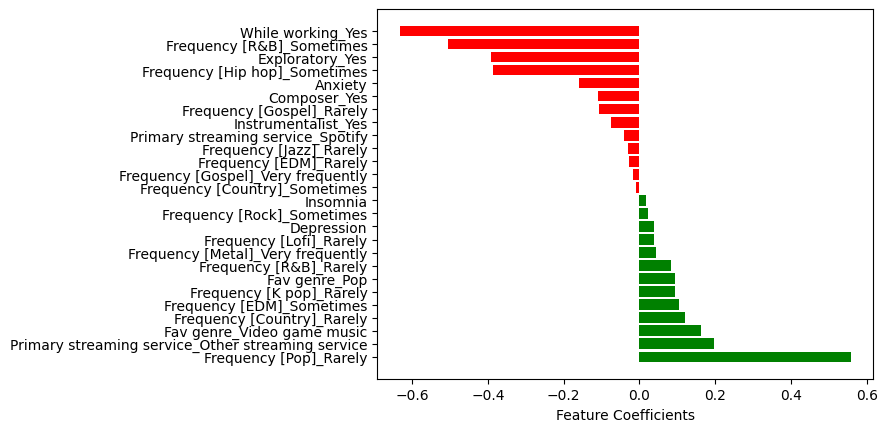

In [223]:
# Get the coefficents for Class 1 (no_effect), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr_l1, 1, feature_cols)
visualize_coefs(coef_dict)

Whereas many more features were used for class 1, but we can see that the coeffiecients were simmetrically balanced without any logical reason.

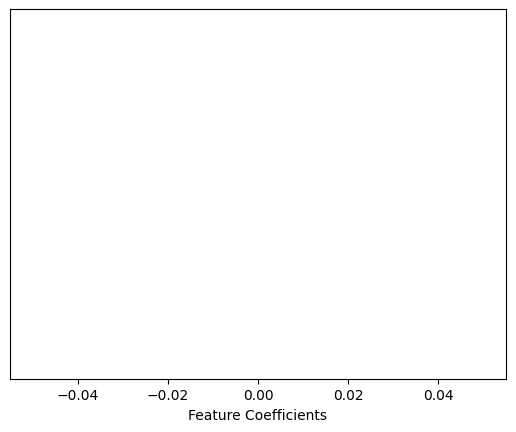

In [224]:
coef_dict = get_feature_coefs(lr_l1, 2, feature_cols)
visualize_coefs(coef_dict)

We still have the problem of underepresentation with class 2.

We are not going to plot the same for L2, since too many features would be involved.

To sum up, we need to use mmh_for_model as dataset, which contains only the most relevant features, and we need to try balancing the class representation.

In [234]:
feature_cols = ['Exploratory_Yes', 'Fav genre_Video game music', 'Instrumentalist_Yes', 'Frequency [EDM]_Rarely', 'While working_Yes']

# Reset the index of the DataFrame
mmh_for_model.reset_index(drop=True, inplace=True)

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(mmh_for_model[feature_cols], mmh_for_model['Music effects']))

# Create the dataframes
X_train = mmh_for_model.loc[train_idx, feature_cols]
y_train = mmh_for_model.loc[train_idx, 'Music effects']

X_test  = mmh_for_model.loc[test_idx, feature_cols]
y_test  = mmh_for_model.loc[test_idx, 'Music effects']

In [235]:
y_train.value_counts(normalize=True)

Music effects
0    0.745020
1    0.231076
2    0.023904
Name: proportion, dtype: float64

In [236]:
X_train.head()

,Exploratory_Yes,Fav genre_Video game music,Instrumentalist_Yes,Frequency [EDM]_Rarely,While working_Yes
655,1,0,1,0,1
195,1,0,0,0,1
240,0,0,0,0,1
157,1,0,0,0,1
269,1,1,1,0,1


In [237]:
y_test.value_counts(normalize=True)

Music effects
0    0.745370
1    0.231481
2    0.023148
Name: proportion, dtype: float64

We want to use syintetic oversampling to increase the representation of minority classes.

SMOTE first creates many pairs or small clusters with two or more similar instances, the measure by instance distance such as Euclidean distance. Then, within the boundary of each pair or cluster, SMOTE uniformly permutes features value, one feature at a time, to populate a collection of similar synthesized instances within each pair or cluster.

As a result, SMOTE creates a class-balanced synthetic dataset without adding duplicated instances with minority labels.

In [233]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [239]:
# Create a SMOTE sampler
smote_sampler = SMOTE(random_state = 42)

In [240]:
# Resample training data using SMOTE
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

<Axes: xlabel='Music effects'>

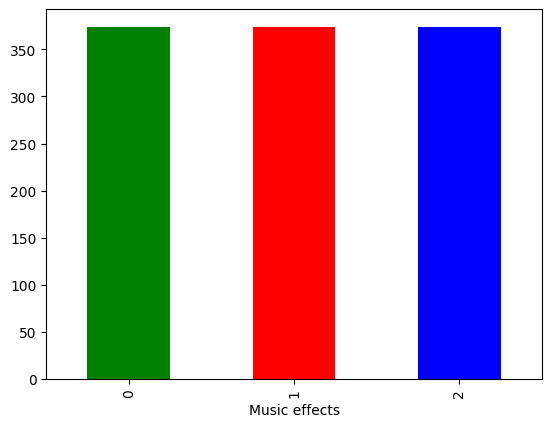

In [241]:
# Visualize classes
y_smo.value_counts().plot.bar(color=['green', 'red', 'blue'])

In [242]:
# Re-train the model with resampled data
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_smo, y_smo)

In [243]:
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_smo, y_smo)

In [245]:
# L2 regularized logistic regression
lr_l2 = LogisticRegression(random_state=42, penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=100000).fit(X_smo, y_smo)

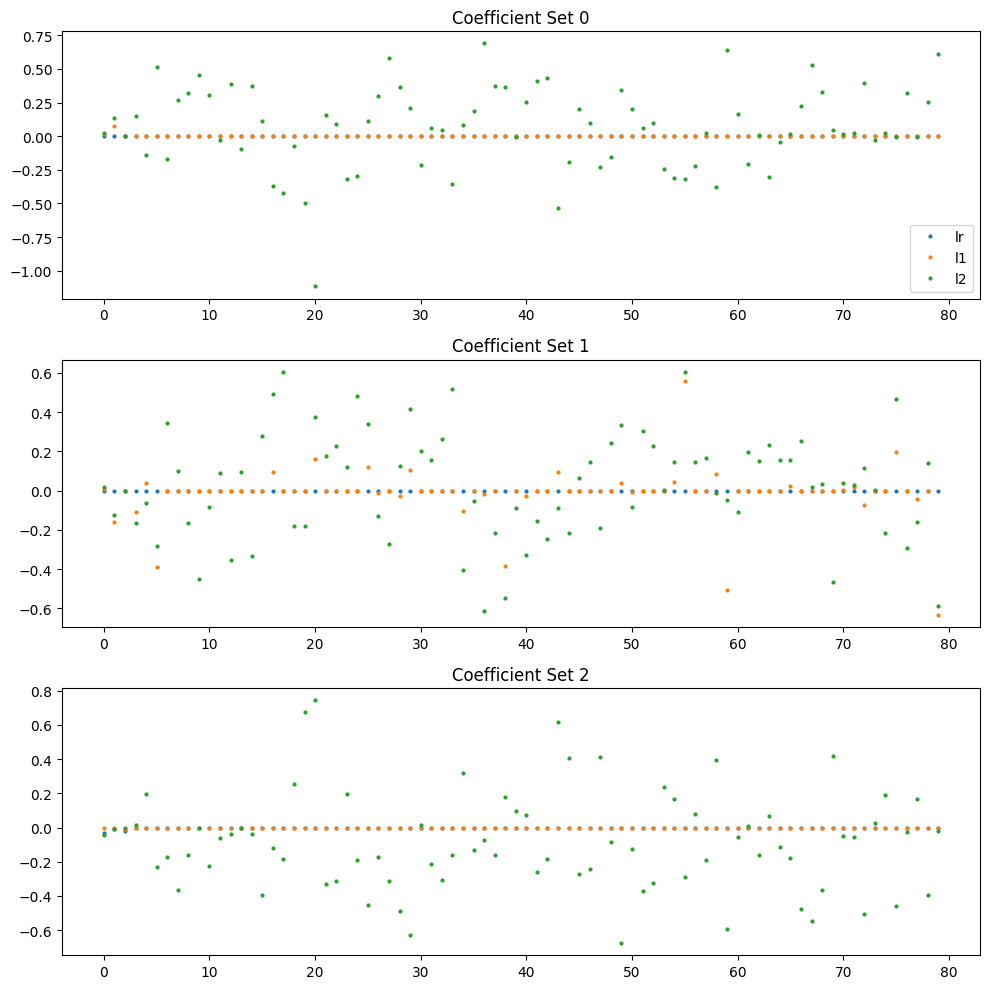

In [246]:
fig, axList = plt.subplots(nrows=3, ncols=1)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [247]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,0,0,0
1,0,1,0
2,2,1,2
3,0,0,0
4,0,0,0


In [248]:
y_prob.head()

,lr,l1,l2
0,0.647702,0.380594,0.659045
1,0.541008,0.338145,0.523055
2,0.452455,0.381262,0.456566
3,0.647702,0.380594,0.659045
4,0.647702,0.380594,0.659045


In [249]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, confusion_matrix

metrics = []
cm = {}

for lab in coeff_labels:
    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred[lab], average='weighted', zero_division=1)

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0, 1, 2]),
                        label_binarize(y_pred[lab], classes=[0, 1, 2]),
                        average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision': precision, 'recall': recall,
                              'fscore': fscore, 'accuracy': accuracy,
                              'auc': auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [250]:
metrics

,lr,l1,l2
precision,0.725981,0.740054,0.722336
recall,0.458333,0.500000,0.439815
fscore,0.556047,0.522647,0.537644
accuracy,0.458333,0.500000,0.439815
auc,0.616744,0.613910,0.610774


Precision remained high. However, recall, fscore, and accuracy fropped significantly. On the bright side, also AUC improved significantly.

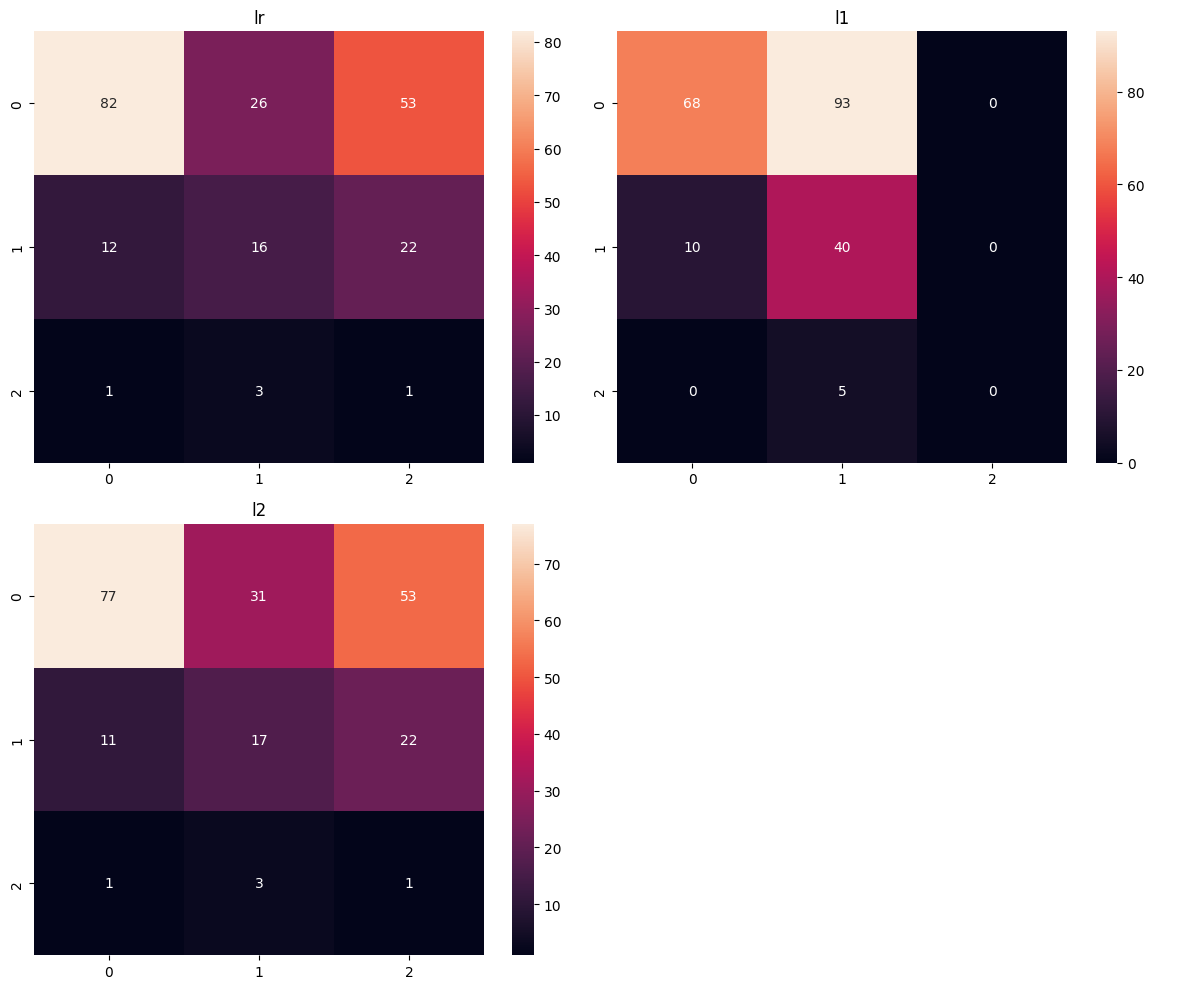

In [251]:
#Let's visualize the confusion matrix
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

L1 is the model that has the most true positives regarding class 1, event if it categorises too many points that belong to class 0 as class 1. On the onder hand, stand logistic regression does the best job in categorizing class 0/

In [252]:
lr.coef_

array([[ 0.52376017, -0.55345041,  1.01557   ,  1.20991943,  0.51621161],
       [-0.29364011,  0.09130348,  0.47823516,  0.28305477, -0.6755569 ],
       [-0.2637601 ,  0.33661048, -2.49300267, -3.18607774,  0.3505678 ]])

In [253]:
lr_l1.coef_

array([[ 0.55149484, -0.58622064,  1.04933969,  1.25948848,  0.55689204],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [254]:
lr_l2.coef_

array([[ 0.38645856, -0.38818548,  1.01509266,  1.3997975 ,  0.3109658 ],
       [-0.17803977,  0.10712508,  0.6999198 ,  0.88742475, -0.49106893],
       [-0.2084188 ,  0.2810604 , -1.71501246, -2.28722225,  0.18010313]])

In [255]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

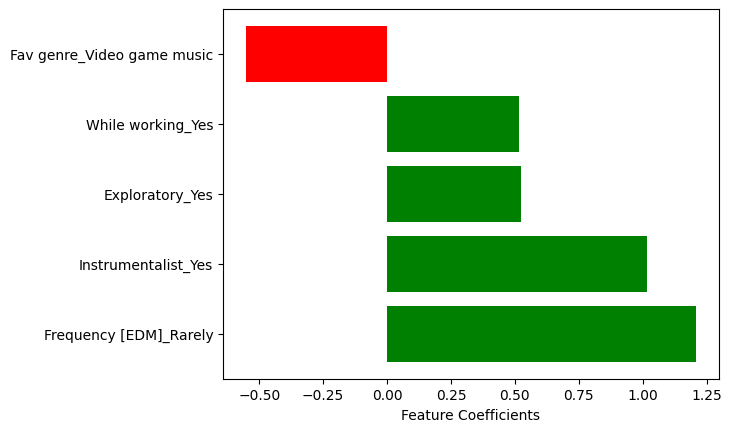

In [257]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr, 0, feature_cols)
visualize_coefs(coef_dict)

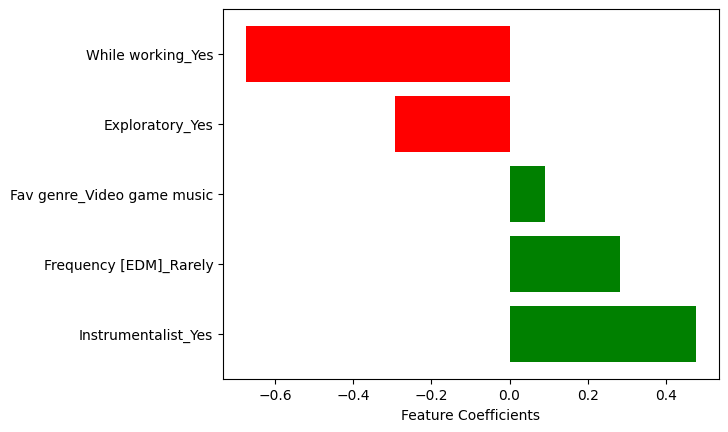

In [258]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr, 1, feature_cols)
visualize_coefs(coef_dict)

We can see that "While working_Yes" and "Exploratory_Yes" are the only two discriminators between class 0 and 1. Whereas Frequency [EDM]_Rarely, and Instrumentalist_Yes may be confusing the model. We might remove those two features, that may be confusing the model.

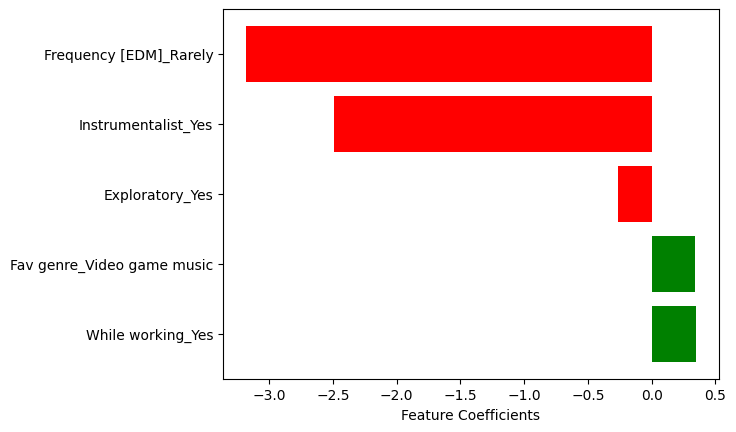

In [259]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr, 2, feature_cols)
visualize_coefs(coef_dict)

Finally class 0 is being represented.

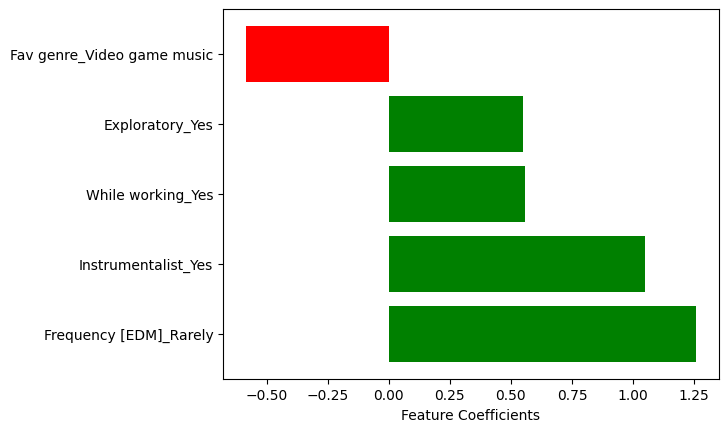

In [260]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr_l1, 0, feature_cols)
visualize_coefs(coef_dict)

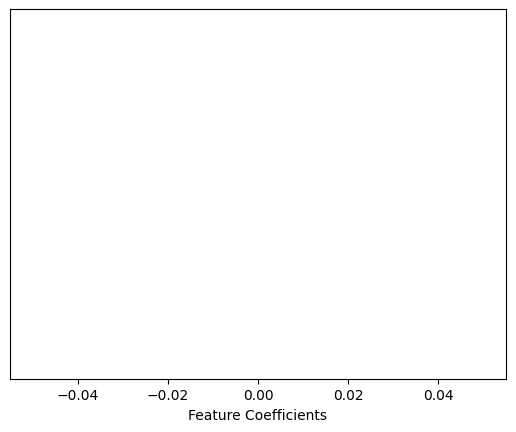

In [261]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr_l1, 1, feature_cols)
visualize_coefs(coef_dict)

Here class 1 is not being rapresented at all with L1.

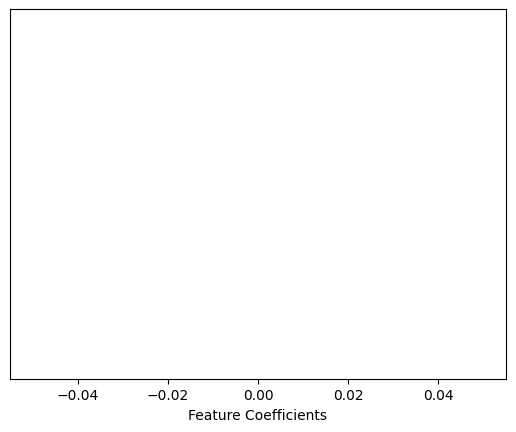

In [262]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr_l1, 2, feature_cols)
visualize_coefs(coef_dict)

And even class 2.

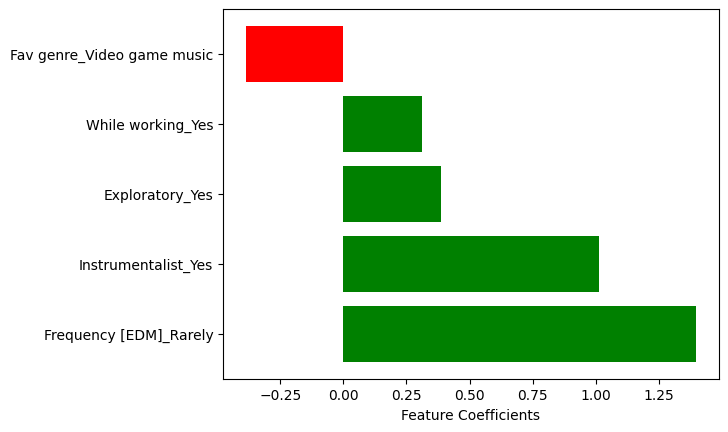

In [263]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr_l2, 0, feature_cols)
visualize_coefs(coef_dict)

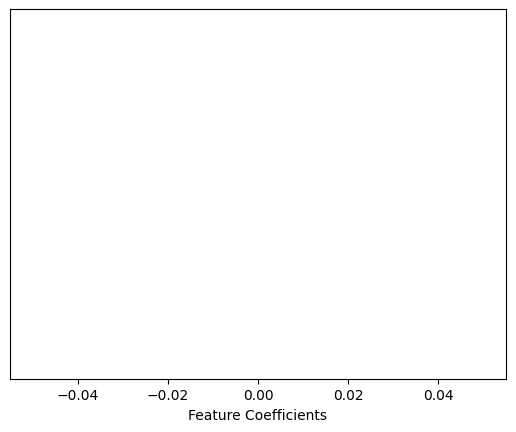

In [264]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr_l1, 1, feature_cols)
visualize_coefs(coef_dict)

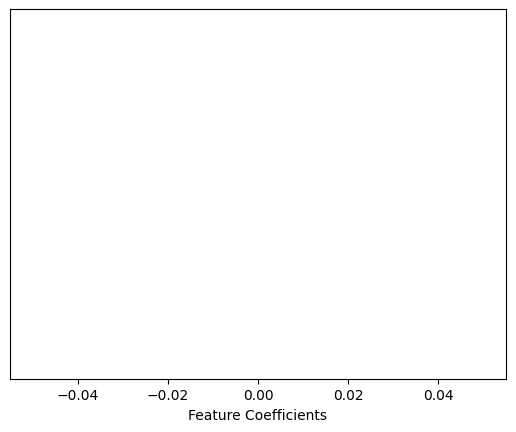

In [265]:
# Get the coefficents for Class 0 (Improved), which is the main class we want to predict.
coef_dict = get_feature_coefs(lr_l1, 2, feature_cols)
visualize_coefs(coef_dict)

Also here, with L2, class 1 and 2 are not represented in term of coefficients. It may be that the models L1 and L2 understood what was going on with the features confusing the model in the logistic regression and penalized all features. This may mean that there are no clear predictors among the independent variables.

The limitations of the dataset are clear, since the dependent variable does not have any clear predictors. However, let's give it a few trials with K Nearest Neighbors.

In [286]:
from sklearn.neighbors import KNeighborsClassifier

In [287]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_smo, y_smo)
y_pred = knn.predict(X_test)

In [294]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2', 'knn']
coeff_models = [lr, lr_l1, lr_l2, knn]
for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2,knn
0,0,0,0,0
1,0,1,0,1
2,2,1,2,0
3,0,0,0,0
4,0,0,0,0


In [295]:
metrics = []
cm = {}

for lab in coeff_labels:
    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred[lab], average='weighted', zero_division=1)

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0, 1, 2]),
                        label_binarize(y_pred[lab], classes=[0, 1, 2]),
                        average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision': precision, 'recall': recall,
                              'fscore': fscore, 'accuracy': accuracy,
                              'auc': auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)

metrics

,lr,l1,l2,knn
precision,0.725981,0.740054,0.722336,0.625053
recall,0.458333,0.500000,0.439815,0.685185
fscore,0.556047,0.522647,0.537644,0.647835
accuracy,0.458333,0.500000,0.439815,0.685185
auc,0.616744,0.613910,0.610774,0.523559


The results of knn look more balanced, however Precision and AUC significantly decreased.

CONCLUSIONS
We can conclude that even if we made some progress by balancing the classes, in the dataset we don't have strong predictors of the dependent variable. Therefore, we can see that the study did not take into account variables that are much stronger predictors of mental health than music.

The next steps include looking at similar studies to find what are the hole in the experiments or what other features can be taken into account. Moreover, we can attempt other models, such as Support Vector Machines, Decision Trees and Random Forest. However, we doubt to obtain reliable results from this dataset, to predict the variable "Music effects".

It's also possible to try removing class 1 "no_effect", since class 0 and class 1 are so similar and the models are finding very difficult distinguishing the two, and this impacts also results on class 2. After all, if there are chances that music can improve mental health, without worseing it, there is no downside in trying. However, if the model struggle with distinguishing the two classes in the first place, we might obtain misleading results from the model.